<a href="https://colab.research.google.com/github/Topexpert647/Finance-literacy-data-analysis/blob/main/Finance_literacy_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing necessary libraries
import pandas as pd
from google.colab import files
import io

# Code to upload the file in Google Colab
uploaded = files.upload()

# File is named 'Finance Literacy.xlsx' and it's uploaded
file_name = next(iter(uploaded))

# Reading the uploaded file
data = pd.read_excel(io.BytesIO(uploaded[file_name]))
#There is no missing values so we just skip to descriptive analysis

# Calculating the frequencies for demographic variables including the course
demographic_columns = ['Gender ', 'Age Bracket', 'Year of Study ', 'Course']
demographic_frequencies = {column: data[column].value_counts() for column in demographic_columns}

# Displaying the frequency counts
for column, frequencies in demographic_frequencies.items():
    print(f"\n{column} Frequencies:")
    print(frequencies)

Saving Financial Literacy.xlsx to Financial Literacy (2).xlsx

Gender  Frequencies:
Male      36
Female    34
Other      2
Name: Gender , dtype: int64

Age Bracket Frequencies:
20 years - 24 years    56
25 years - 29 years    11
Under 20                5
Name: Age Bracket, dtype: int64

Year of Study  Frequencies:
Fourth Year    37
Third Year     29
Second Year     5
First Year      1
Name: Year of Study , dtype: int64

Course Frequencies:
Asset Management;Banking                       23
Bachelor of Commerce Finance option            20
Banking                                        12
Asset Management                               12
Asset Management;Insurance                      1
Microfinance                                    1
Banking;Insurance                               1
Banking;Bachelor of Commerce Finance option     1
Financial Corporatives                          1
Name: Course, dtype: int64


In [6]:
from google.colab import files
import numpy as np
df = pd.read_excel(file_name)
# Summary Statistics
summary_stats = df.describe(include=[np.number])

# Frequency Counts
frequency_counts = df.describe(include=[object])

# Summary statistics table
summary_stats_table = summary_stats.transpose()

# Frequency counts table
frequency_counts_table = frequency_counts.transpose()

# Displaying the tables
print("Summary Statistics for Numerical Variables:")
print(summary_stats_table)

print("\nFrequency Counts for Categorical Variables:")
print(frequency_counts_table)

Summary Statistics for Numerical Variables:
                                                    count      mean       std  \
How would you rate your understanding of how in...   72.0  3.750000  1.135223   
A rise in Interest rates by the central bank is...   72.0  2.486111  1.244629   
How confident are you in your understanding of ...   72.0  2.208333  1.209557   
Inflation can dilute the returns on a Treasury ...   72.0  2.152778  1.134103   
How familiar are you with the concept of risk d...   72.0  1.986111  1.094069   
Investing in more than one stock reduces the ov...   72.0  1.958333  1.143721   
How has financial education influenced your inv...   72.0  2.000000  1.150628   
Financial education can enhance an individual's...   72.0  2.013889  1.168761   
How often do you research before making an inve...   72.0  3.597222  1.158675   
How would you rank your risk tolerance level         72.0  2.916667  1.183811   

                                                    min  25%  50

<Figure size 1500x2000 with 0 Axes>

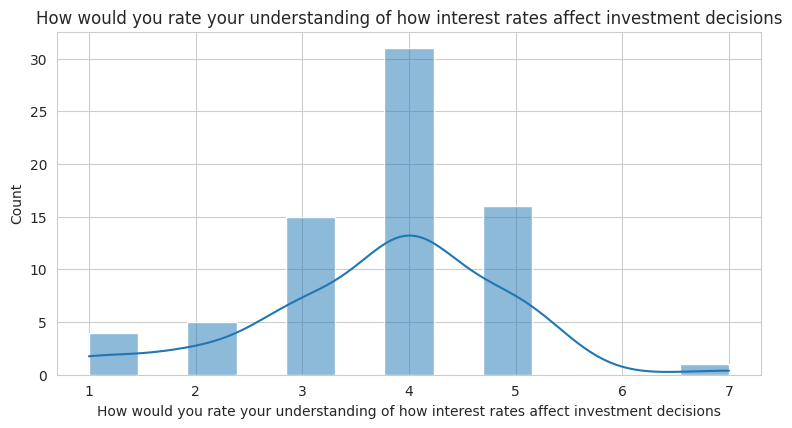

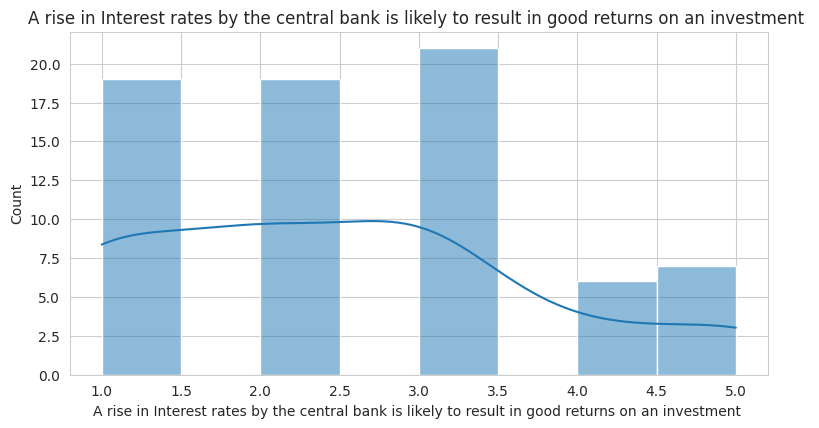

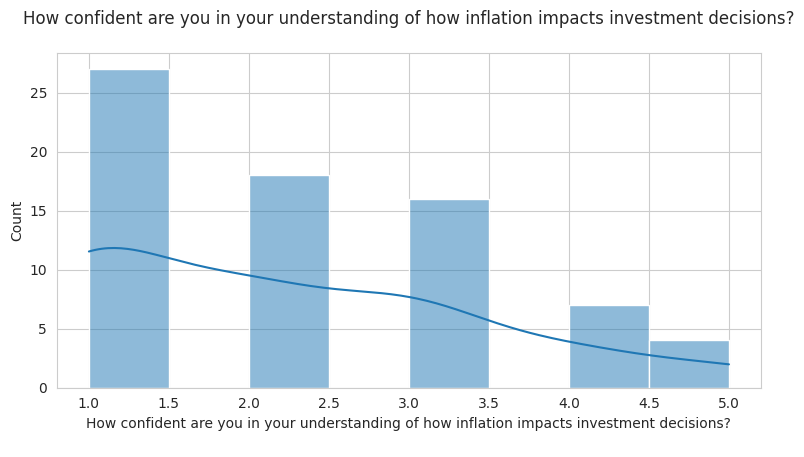

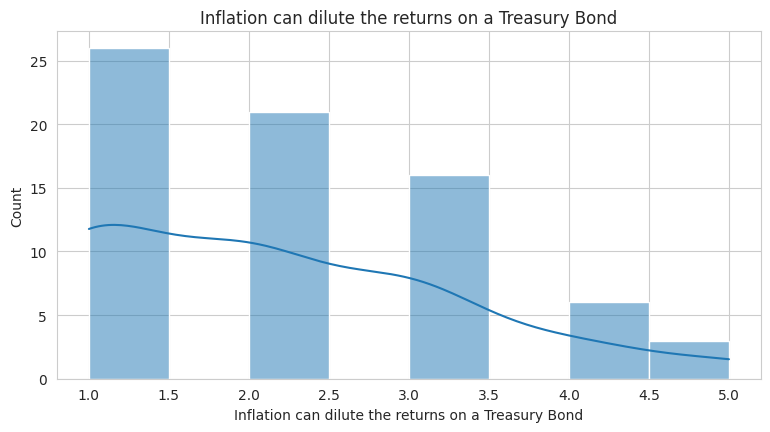

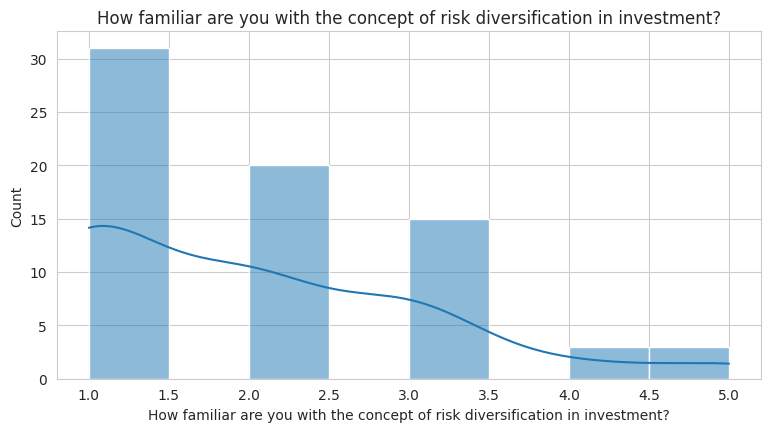

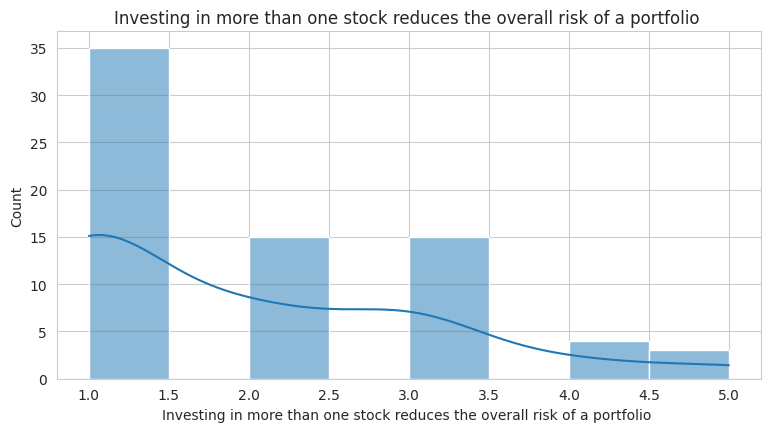

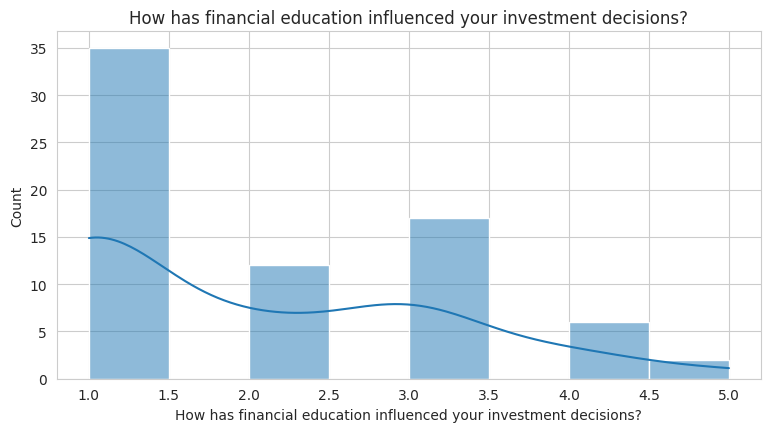

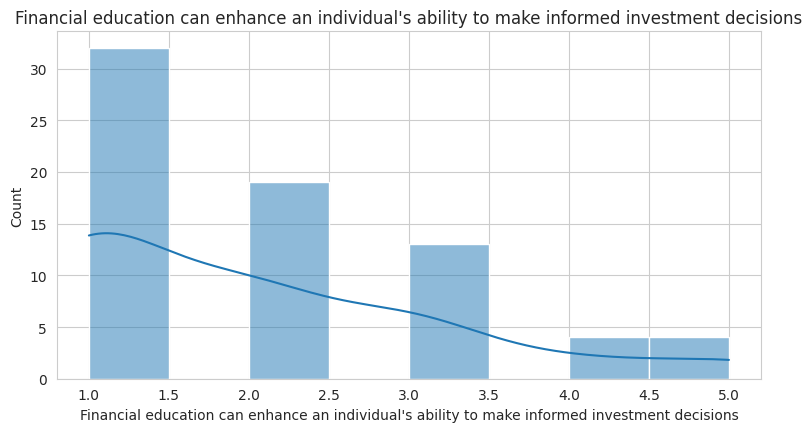

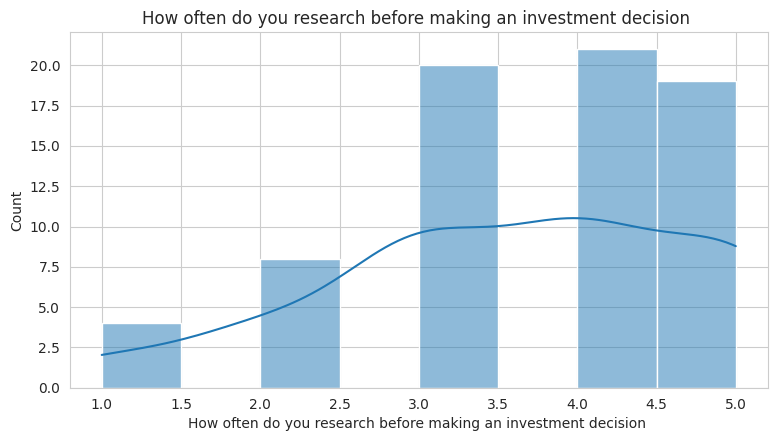

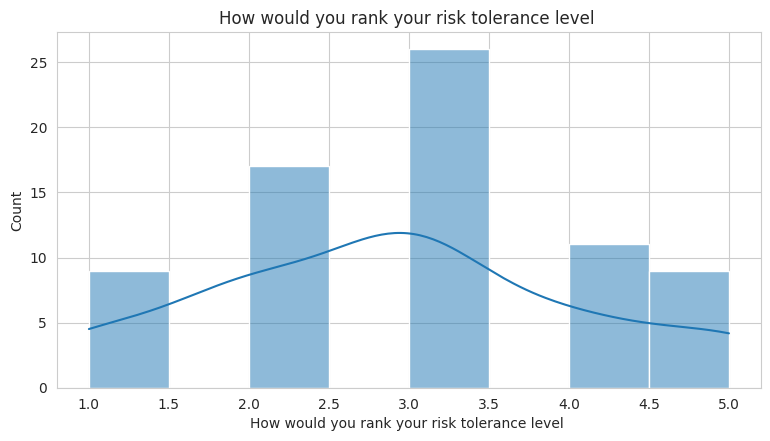

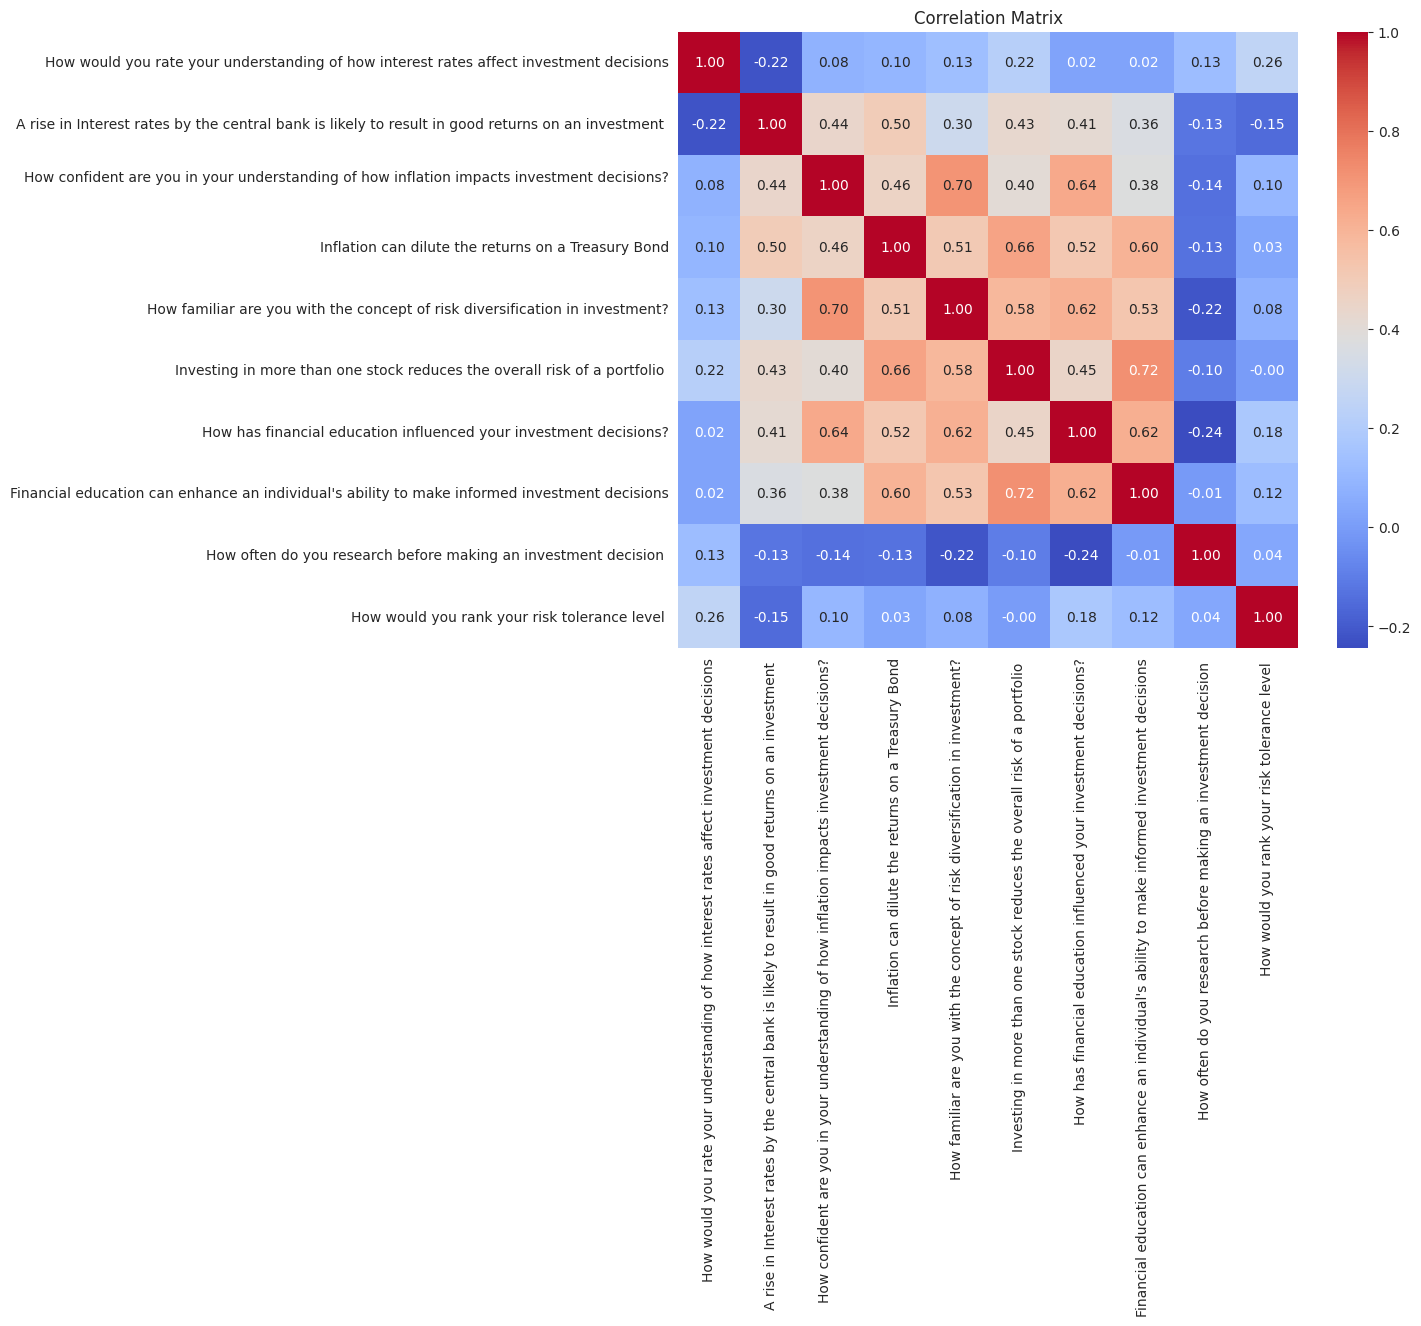

In [14]:
# Distribution Analysis
# Plotting histograms and a correlation matrix for all numerical columns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Excel file
df = pd.read_excel(file_name)

# Setting the aesthetic style of the plots
sns.set_style('whitegrid')

# Exploratory Data Analysis: Distribution Analysis
# Determining the number of numerical columns for plotting
num_cols = df.select_dtypes(include=[np.number]).columns
n_rows = (len(num_cols) + 1) // 2  # Calculate the number of rows needed for subplots


# Plotting histograms for all numerical columns
for i, column in enumerate(num_cols, 1):
    plt.figure(figsize=(15, 4 * n_rows)) # Setting a larger figure size for readability
    plt.subplot(n_rows, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()
    plt.show()

# Correlation Analysis
# Computing the correlation matrix for numerical variables
correlation_matrix = df[num_cols].corr()

# Plottng the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
#calculating indexes based on each set of questions to be used in regression

# Getting the file name from the uploaded file
file_name = next(iter(uploaded))

#Defining the columns for each index based on your dataset

# Financial Literacy Index
financial_literacy_questions = [
    'A rise in Interest rates by the central bank is likely to result in good returns on an investment ',
    'Inflation can dilute the returns on a Treasury Bond',
    'Investing in more than one stock reduces the overall risk of a portfolio ',
    "Financial education can enhance an individual's ability to make informed investment decisions",
    'How often do you research before making an investment decision '
]

# Interest Rate Index
interest_rate_questions = [
    'How would you rate your understanding of how interest rates affect investment decisions',
    'A rise in Interest rates by the central bank is likely to result in good returns on an investment '
]

# Inflation Index
inflation_questions = [
    'How confident are you in your understanding of how inflation impacts investment decisions?\n',
    'Inflation can dilute the returns on a Treasury Bond'
]

# Risk Diversification Index
risk_diversification_questions = [
    'How familiar are you with the concept of risk diversification in investment?',
    'Investing in more than one stock reduces the overall risk of a portfolio '
]

# Calculating each index as the average of the relevant questions
data['Financial Literacy Index'] = data[financial_literacy_questions].mean(axis=1)
data['Interest Rate Index'] = data[interest_rate_questions].mean(axis=1)
data['Inflation Index'] = data[inflation_questions].mean(axis=1)
data['Risk Diversification Index'] = data[risk_diversification_questions].mean(axis=1)

# Displaying the first few rows to verify
data[['Financial Literacy Index', 'Interest Rate Index', 'Inflation Index', 'Risk Diversification Index']].head()


,Financial Literacy Index,Interest Rate Index,Inflation Index,Risk Diversification Index
0,2.6,3.5,2.5,2.5
1,2.6,3.0,3.0,3.0
2,2.4,2.0,2.0,2.0
3,3.6,4.0,4.0,3.0
4,2.8,3.5,3.0,2.0


In [16]:
#Performing the regression

# Importing necessary libraries
import statsmodels.api as sm
from google.colab import files

# Performing the regression analysis
X = data[['Interest Rate Index', 'Inflation Index', 'Risk Diversification Index']]
Y = data['Financial Literacy Index']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model_summary = model.summary()
print(model_summary)

                               OLS Regression Results                               
Dep. Variable:     Financial Literacy Index   R-squared:                       0.680
Model:                                  OLS   Adj. R-squared:                  0.666
Method:                       Least Squares   F-statistic:                     48.12
Date:                      Mon, 18 Mar 2024   Prob (F-statistic):           8.47e-17
Time:                              09:54:10   Log-Likelihood:                -41.693
No. Observations:                        72   AIC:                             91.39
Df Residuals:                            68   BIC:                             100.5
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

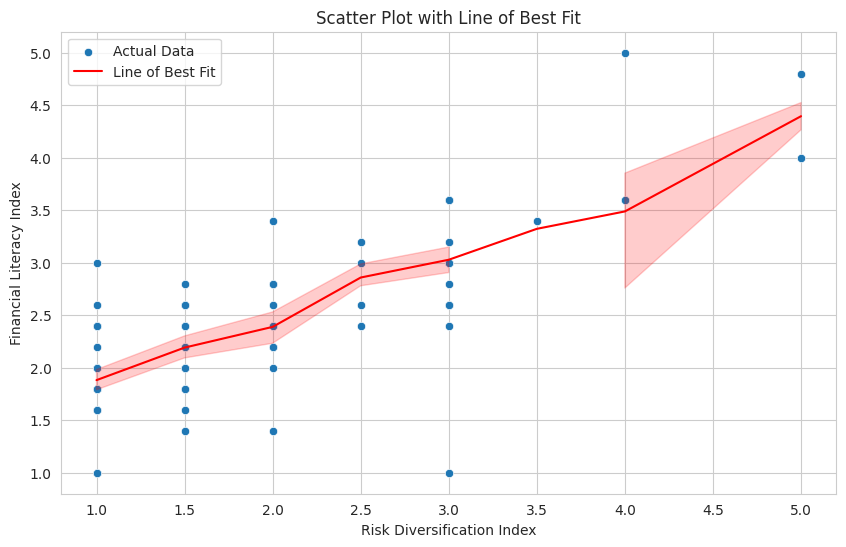

In [17]:
#Creating one scatter plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Coefficients from the regression output
alpha = 0.5172  # constant
beta1 = 0.2593  # coefficient for Interest Rate Index
beta2 = 0.2229  # coefficient for Inflation Index
beta3 = 0.3194  # coefficient for Risk Diversification Index

# Calculating the predicted Financial Literacy Index (Y_hat)
data['Y_hat'] = alpha + beta1 * data['Interest Rate Index'] + beta2 * data['Inflation Index'] + beta3 * data['Risk Diversification Index']

# Selecting the representative independent variable for the plot
X_plot = data['Risk Diversification Index']
Y_actual = data['Financial Literacy Index']
Y_predicted = data['Y_hat']

# Plotting the scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_plot, y=Y_actual, label='Actual Data')
sns.lineplot(x=X_plot, y=Y_predicted, color='red', label='Line of Best Fit')
plt.title('Scatter Plot with Line of Best Fit')
plt.xlabel('Risk Diversification Index')
plt.ylabel('Financial Literacy Index')
plt.legend()
plt.show()


In [18]:
# Performing multi-collinearity test
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Adding a constant to the model
X = sm.add_constant(X)

# Calculating VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                      feature        VIF
0                       const  18.853489
1         Interest Rate Index   1.444719
2             Inflation Index   2.451954
3  Risk Diversification Index   2.334051


In [ ]:
# All VIF values for the predictors are significantly below the commonly used threshold of 5 or even the more conservative threshold of 10
# None of the explanatory variables in the model show signs of high multicollinearity that would warrant immediate concern or necessitate model revision.